# Setup

In [2]:
from Research_Scraper_Code.Research_Scraper import ResearchScraper
import pandas as pd
import time
import json
import urllib.parse


def load_publications_from_csv():
    data = '../Application/data/publications_without_abstract.csv'

    with open(data) as f:
        df = pd.read_csv(f, sep=';')
    return df


df_publications = load_publications_from_csv()



# 1. Motivation
## Anteil der Publikationen mit URL/DOI

In [3]:
df_publications = load_publications_from_csv()
df_publications_filtered = df_publications[df_publications['doi'].notna() | df_publications['url'].notna()]
df_publications_filtered.shape
df_publications_filtered
print(f'Anteil: {(df_publications_filtered.shape[0] / df_publications.shape[0]) * 100}%')

Anteil: 25.87087784486763%


# 3. Aufbau verschiedener Publikations-Webseite
## Top Publikations-Webseiten

In [4]:
import json

# read most recent scraping result
with open('../Application/exports/scrapings/scrapings_2022_10_19__03_56.json') as f:
    scraping_results_imported = json.load(f)

# get for rows that have a DOI
df_publications_filtered = df_publications[df_publications['doi'].notna()]
# extract DOI
df_doi = df_publications_filtered['doi']
# remove backslashes from DOI
df_doi = df_doi.str.replace(r'\\', '', regex=True)
# create a list of DOI Links
doi_links = [f'https://doi.org/{doi}' for doi in df_doi]

In [4]:
# resolve DOI Links
import requests


def get_link(url):
    try:
        r = requests.head(url, allow_redirects=True, timeout=30)
        msg = f'Nice - Link resolved: {url} \t >> {r.url}'
        print(f'\033[92m{msg}\033[0m')  # green printing
        return r.url
    except:
        # print in red
        msg = f'Error - Could not resolve: {url}'
        print(f'\033[91m{msg}\033[0m')  # red printing
        return None


def resolve_all_links(doi_links):
    result_links = []
    for idx, link in enumerate(doi_links):
        res_link = get_link(link)
        result_links.append(res_link)
        msg = (f'Resolved link #{idx + 1} of {len(doi_links)}: {res_link}')
        print(f'\033[92m{msg}\033[0m')  # green printing
    return result_links


In [ ]:
# resolve all links with the methods from above
all_resolved_links = resolve_all_links(doi_links)

Nice - Link resolved: https://doi.org/10.1007/978-3-7908-2336-3_5 	 >> https://link.springer.com/chapter/10.1007/978-3-7908-2336-3_5
Resolved link #1 of 1623: https://link.springer.com/chapter/10.1007/978-3-7908-2336-3_5
Nice - Link resolved: https://doi.org/10.1109/HICSS.2010.190 	 >> https://ieeexplore.ieee.org/document/5428539/
Resolved link #2 of 1623: https://ieeexplore.ieee.org/document/5428539/
Nice - Link resolved: https://doi.org/10.1007/978-3-642-03516-6_34 	 >> https://link.springer.com/chapter/10.1007/978-3-642-03516-6_34
Resolved link #3 of 1623: https://link.springer.com/chapter/10.1007/978-3-642-03516-6_34
Nice - Link resolved: https://doi.org/10.1007/978-3-540-85204-9_11 	 >> https://link.springer.com/chapter/10.1007/978-3-540-85204-9_11
Resolved link #4 of 1623: https://link.springer.com/chapter/10.1007/978-3-540-85204-9_11
Error - Could not resolve: https://doi.org/10.1080/10196780802420687
Resolved link #5 of 1623: None
Nice - Link resolved: https://doi.org/10.1007/9

In [ ]:
# alternative way, not very efficient but joins the urls with the cris data
import requests


def get_link(url):
    try:
        r = requests.head(url, allow_redirects=True, timeout=30)
        msg = f'Link resolved: '
        print(f'\033[92m{msg}\033[0m', f'{url}  >> {r.url}')  # green printing
        return r.url
    except:
        # print in red
        msg = f'Error - Could not resolve: {url}'
        print(f'\033[91m{msg}\033[0m')  # red printing
        return None


# filter df_publications with doi not null
df_publications_filtered = df_publications[df_publications['doi'].notna()]
# search for dois that contain backslash
# replace backslashes with '' in doi
df_publications_filtered['doi'] = df_publications_filtered['doi'].str.replace(r'\\', '', regex=True)
# new column doi_link
df_publications_filtered['doi_link'] = df_publications_filtered['doi'].apply(lambda x: f'https://doi.org/{x}')
# only columns: cris-id, title, publication_type, doi, doi_link
df_publications_filtered = df_publications_filtered[['cris_id', 'title', 'publication_type', 'doi', 'doi_link']]
df_publications_filtered.head()
# new column resolved_doi_link
df_publications_filtered['resolved_doi_link'] = df_publications_filtered['doi_link'].apply(lambda x: get_link(x))
df_publication_resolved_doi_links = df_publications_filtered

/var/folders/lg/5ty335k120vb43f4mqg52kjh0000gn/T/ipykernel_71582/436096088.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publications_filtered['doi'] = df_publications_filtered['doi'].str.replace(r'\\', '', regex=True)
/var/folders/lg/5ty335k120vb43f4mqg52kjh0000gn/T/ipykernel_71582/436096088.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publications_filtered['doi_link'] = df_publications_filtered['doi'].apply(lambda x: f'https://doi.org/{x}')


Link resolved:  https://doi.org/10.1007/978-3-7908-2336-3_5  >> https://link.springer.com/chapter/10.1007/978-3-7908-2336-3_5
Link resolved:  https://doi.org/10.1109/HICSS.2010.190  >> https://ieeexplore.ieee.org/document/5428539/
Link resolved:  https://doi.org/10.1007/978-3-642-03516-6_34  >> https://link.springer.com/chapter/10.1007/978-3-642-03516-6_34
Link resolved:  https://doi.org/10.1007/978-3-540-85204-9_11  >> https://link.springer.com/chapter/10.1007/978-3-540-85204-9_11
Link resolved:  https://doi.org/10.1080/10196780802420687  >> https://www.tandfonline.com/doi/full/10.1080/10196780802420687
Link resolved:  https://doi.org/10.1007/978-3-642-11859-3_10  >> https://link.springer.com/chapter/10.1007/978-3-642-11859-3_10
Link resolved:  https://doi.org/10.1007/978-3-642-11859-3_11  >> https://link.springer.com/chapter/10.1007/978-3-642-11859-3_11
Link resolved:  https://doi.org/10.1007/s12525-010-0032-0  >> https://link.springer.com/article/10.1007/s12525-010-0032-0
Link resol

In [ ]:

# only run after running complete code above
# export results as csv
#     df_resolved_links = pd.DataFrame(all_resolved_links, columns=['resolved_link'])
# remove links that still contain doi.org (those could not be resolved)
#    df_resolved_links = df_resolved_links[df_resolved_links['resolved_link'].str.contains('doi.org') == False]
#    df_resolved_links.to_csv('../Application/exports/dataframes/resolved_links.csv', index=False)
# export result of alternative way as csv
#   df_publication_resolved_doi_links.to_csv('../Application/exports/dataframes/resolved_links_alternative.csv',
#                                         index=False)

In [6]:
# get all domains from resolved links (using exported csv file)
def domain(url):
    if url is not None and pd.notna(url):
        return urllib.parse.urlparse(url).netloc  # returns domain
    else:
        return None

In [7]:
# read csv
all_resolved_links = pd.read_csv('../Application/exports/dataframes/resolved_links.csv')
df_with_resolved_links = pd.read_csv(
    '../Application/exports/dataframes/resolved_links_alternative.csv')  # when we want to map it to cris data
domains_of_doi_links = [domain(link) for link in all_resolved_links['resolved_link']]
domains_of_doi_links

['link.springer.com',
 'ieeexplore.ieee.org',
 'link.springer.com',
 'link.springer.com',
 'www.tandfonline.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'ieeexplore.ieee.org',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'ieeexplore.ieee.org',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'www.emerald.com',
 'link.springer.com',
 'www.igi-global.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'link.springer.com',
 'l

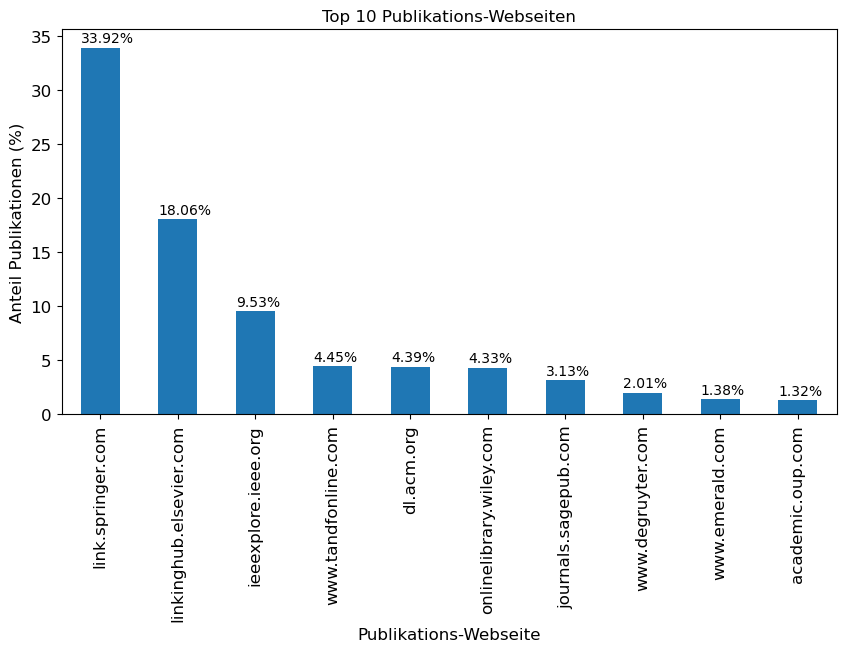

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the Plot
# Data prep
# create df
df_domains_of_doi_links = pd.DataFrame(domains_of_doi_links, columns=['domain'])
# group
publication_websites = df_domains_of_doi_links.groupby('domain')
# Top 10 websites
top_publication_websites = publication_websites.size().nlargest(10)

# Plot
# bar chart of publishers with top 10 values
y = (top_publication_websites / len(domains_of_doi_links)) * 100
ax = y.plot(kind='bar', title="Top 10 Publikations-Webseiten", figsize=(10, 5), legend=False, fontsize=12)
ax.set_xlabel("Publikations-Webseite", fontsize=12)
ax.set_ylabel("Anteil Publikationen (%)", fontsize=12)
# labels
for i, v in enumerate(y):
    ax.text(i - 0.25, v + 0.5, str(round(v, 2)) + '%', color='black')
plt.savefig("../Application/exports/plots/Publisher_websites.pdf", dpi=600, bbox_inches="tight")
plt.savefig("../Application/exports/plots/Publisher_websites.png", dpi=600, bbox_inches="tight")
plt.show()

left_plot = plt

## Kumulierter Anteil der Publikations-Webseiten

In [10]:
# top publishers with count and cumulative share in a df (n is without 'doi.org' urls)
n = len(domains_of_doi_links)
top_publication_websites_cum = publication_websites.size().nlargest(50)
top_publication_websites_cum = top_publication_websites_cum.to_frame().reset_index()
top_publication_websites_cum.columns = ['publisher', 'count']
top_publication_websites_cum['rel_share'] = round(top_publication_websites_cum['count'] / n, 2)
top_publication_websites_cum['cum_share'] = round(top_publication_websites_cum['count'].cumsum() / n, 2)

top_publication_websites_cum

,publisher,count,rel_share,cum_share
0,link.springer.com,541,0.34,0.34
1,linkinghub.elsevier.com,288,0.18,0.52
2,ieeexplore.ieee.org,152,0.10,0.62
3,www.tandfonline.com,71,0.04,0.66
4,dl.acm.org,70,0.04,0.70
5,onlinelibrary.wiley.com,69,0.04,0.75
6,journals.sagepub.com,50,0.03,0.78
7,www.degruyter.com,32,0.02,0.80
8,www.emerald.com,22,0.01,0.81
9,academic.oup.com,21,0.01,0.83


## Top Publikations-Typen

In [11]:
# publication_types = df_links[df_links['publisher_page'] != 'doi.org'].groupby('publication_type')
#
# y = publication_types.size().sort_values(ascending=False)
# ax = y.plot(kind='bar', title="Amount of publication types", figsize=(10, 5), legend=False, fontsize=12)
# ax.set_xlabel("Publication type", fontsize=12)
# ax.set_ylabel("Number of Publications", fontsize=12)
# plt.savefig("../exports/eda/Publication_types.pdf", dpi=600, bbox_inches="tight")
# plt.savefig("../exports/eda/Publication_types.png", dpi=600, bbox_inches="tight")
# plt.show()

In [12]:
# apply domain method on df for new column
df_with_resolved_links['domain'] = df_with_resolved_links['resolved_doi_link'].apply(lambda x: domain(str(x)))

In [13]:
# search  rows where 'doi.org' in domain and remove them
df_with_resolved_links_cleaned = df_with_resolved_links[
    df_with_resolved_links['domain'].str.contains('doi.org') == False]

In [14]:
websites = df_with_resolved_links_cleaned.groupby('domain')
idx = websites.size().nlargest(10).index
unique_types_per_website = df_with_resolved_links_cleaned.groupby('domain')['publication_type'].unique()
unique_types_per_website_top10 = unique_types_per_website[idx]
unique_types_per_website_top10

domain
link.springer.com          [Forschungsartikel (Buchbeitrag), Forschungsar...
linkinghub.elsevier.com    [Forschungsartikel (Zeitschrift), Forschungsar...
ieeexplore.ieee.org        [Forschungsartikel in Sammelband (Konferenz), ...
www.tandfonline.com                        [Forschungsartikel (Zeitschrift)]
dl.acm.org                 [Forschungsartikel in Sammelband (Konferenz), ...
onlinelibrary.wiley.com    [Forschungsartikel (Zeitschrift), Forschungsar...
journals.sagepub.com       [Forschungsartikel (Zeitschrift), Forschungsar...
www.degruyter.com          [Forschungsartikel (Zeitschrift), Nicht-wissen...
www.emerald.com            [Forschungsartikel (Zeitschrift), Forschungsar...
academic.oup.com                           [Forschungsartikel (Zeitschrift)]
Name: publication_type, dtype: object

We can look at the types of the three pages

Springer

In [15]:
springer_types = df_with_resolved_links_cleaned[
    df_with_resolved_links_cleaned['domain'] == 'link.springer.com'].groupby('publication_type')
springer_types.size().sort_values(ascending=False)

publication_type
Forschungsartikel (Zeitschrift)                               225
Forschungsartikel in Sammelband (Konferenz)                   144
Forschungsartikel (Buchbeitrag)                               137
Fachbuch (Herausgegebenes Buch)                                13
Fachbuch (Monographie)                                          7
Qualifikationsschrift (Dissertation, Habilitationsschrift)      6
Nicht-wissenschaftlicher Beitrag (Zeitschrift)                  4
Abstract als ePaper (Konferenz)                                 1
Forschungsartikel in Zeitschrift (Konferenz)                    1
Lexikonartikel (Buchbeitrag)                                    1
Sonstige wissenschaftliche Veröffentlichung                     1
Übersichtsartikel (Zeitschrift)                                 1
dtype: int64

ScienceDirect

In [16]:
sciencedirect_types = df_with_resolved_links_cleaned[
    df_with_resolved_links_cleaned['domain'] == 'linkinghub.elsevier.com'].groupby('publication_type')
sciencedirect_types.size().sort_values(ascending=False)

publication_type
Forschungsartikel (Zeitschrift)                 281
Arbeitspapier / Working Paper                     3
Forschungsartikel in Sammelband (Konferenz)       2
Forschungsartikel (Buchbeitrag)                   1
Forschungsartikel in Zeitschrift (Konferenz)      1
dtype: int64

IEEE

In [17]:
ieee_types = df_with_resolved_links_cleaned[df_with_resolved_links_cleaned['domain'] == 'ieeexplore.ieee.org'].groupby(
    'publication_type')
ieee_types.size().sort_values(ascending=False)

publication_type
Forschungsartikel in Sammelband (Konferenz)    134
Forschungsartikel (Zeitschrift)                 18
dtype: int64

Other websites

In [18]:
other_types = df_with_resolved_links_cleaned[
    (df_with_resolved_links_cleaned['domain'] != 'link.springer.com') & (
            df_with_resolved_links_cleaned['domain'] != 'linkinghub.elsevier.com') & (
            df_with_resolved_links_cleaned['domain'] != 'ieeexplore.ieee.org')].groupby('publication_type')
other_types.size().sort_values(ascending=False)

#df_plot = df_plot[df_plot.index.isin(['Journal Article', 'Conference Paper', 'Book'])]

publication_type
Forschungsartikel (Zeitschrift)                               408
Forschungsartikel in Sammelband (Konferenz)                   151
Forschungsartikel (Buchbeitrag)                                23
Arbeitspapier / Working Paper                                  13
Fachbuch (Monographie)                                          5
Abstract als ePaper (Konferenz)                                 3
Nicht-wissenschaftlicher Beitrag (Zeitschrift)                  3
Rezension (Zeitschrift)                                         3
Qualifikationsschrift (Dissertation, Habilitationsschrift)      2
Forschungsartikel (ePaper)                                      1
Forschungsartikel als ePaper (Konferenz)                        1
Poster                                                          1
Sonstige wissenschaftliche Veröffentlichung                     1
dtype: int64

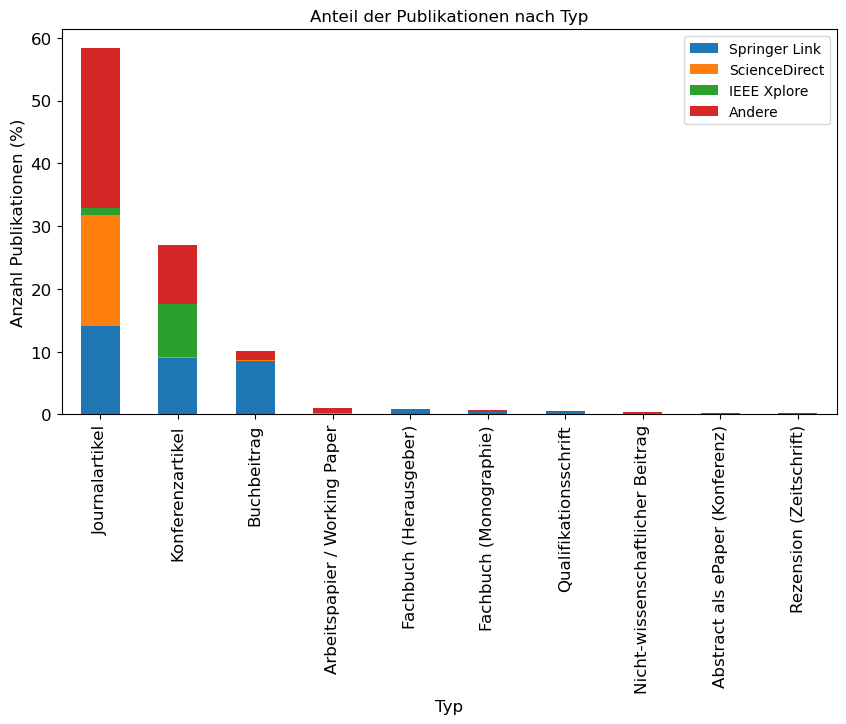

In [19]:
# (finally) plotting
# stacked bar chart of most present publication types with top 10 values for every publisher
publication_types = df_with_resolved_links_cleaned.groupby('publication_type')
# create df with publishers as columns and publication types as rows
df_plot = pd.DataFrame(index=publication_types.size().nlargest(10).sort_values(ascending=False).index)
df_plot['link.springer.com'] = springer_types.size().nlargest(10).sort_values(ascending=False)
df_plot['linkinghub.elsevier.com'] = sciencedirect_types.size().nlargest(10).sort_values(ascending=False)
df_plot['ieeexplore.ieee.org'] = ieee_types.size().nlargest(10).sort_values(ascending=False)
df_plot['other_publisher_pagess'] = other_types.size().nlargest(10).sort_values(ascending=False)

# relative share of publication types
df_plot = (df_plot / df_with_resolved_links_cleaned.shape[0]) * 100

ax = df_plot.plot(kind='bar', title='Anteil der Publikationen nach Typ', stacked=True, figsize=(10, 5),
                  fontsize=12)
ax.set_xlabel("Typ", fontsize=12)
ax.set_ylabel("Anzahl Publikationen (%)", fontsize=12)
# change x values to custom labels
ax.set_xticklabels(
    ['Journalartikel', 'Konferenzartikel', 'Buchbeitrag', 'Arbeitspapier / Working Paper', 'Fachbuch (Herausgeber)',
     'Fachbuch (Monographie)',
     'Qualifikationsschrift', 'Nicht-wissenschaftlicher Beitrag', 'Abstract als ePaper (Konferenz)',
     'Rezension (Zeitschrift)'])
# custom legend
ax.legend(['Springer Link', 'ScienceDirect', 'IEEE Xplore', 'Andere'])
plt.savefig("../Application/exports/plots/Publication_types_per_website.pdf", dpi=600, bbox_inches="tight")
plt.savefig("../Application/exports/plots/Publication_types_per_website.png", dpi=600, bbox_inches="tight")
plt.show()
# save plot for facet grid


# Scholary
## Gefundene URLs durch Scholary

In [11]:
with open('../Application/exports/scrapings/url_scrape_results_0_to_49.json') as f:
    pub_res_chunk_0 = json.load(f)
with open('../Application/exports/scrapings/url_scrape_results_50_to_99.json') as f:
    pub_res_chunk_1 = json.load(f)
with open('../Application/exports/scrapings/url_scrape_results_100_to_149.json') as f:
    pub_res_chunk_2 = json.load(f)

#combine chunks
pub_res_0_to_149 = pub_res_chunk_0 + pub_res_chunk_1 + pub_res_chunk_2
# count how many urls were found
amount_urls_found = len([pub for pub in pub_res_0_to_149 if pub.get('url') is not None])
print(f'Anzahl gefundener URLs: {amount_urls_found} aus {len(pub_res_0_to_149)} Publikationen')

# get those urls
urls = [pub.get('url') for pub in pub_res_0_to_149 if pub.get('url') is not None]
domains = [domain(url) for url in urls]

# Count domains, sort by count
domains_grouped = pd.DataFrame(domains, columns=['domain']).groupby('domain').size().reset_index(name='count')
domains_grouped = domains_grouped.sort_values(by='count', ascending=False)
# change col names
domains_grouped.columns = ['Webseite', 'Anzahl gefundener URLs']
print(domains_grouped)

Anzahl gefundener URLs: 118 aus 149 Publikationen
                            Webseite  Anzahl gefundener URLs
6                  link.springer.com                      38
0                   aisel.aisnet.org                      37
16              www.researchgate.net                      13
11                   www.econstor.eu                       4
1                   books.google.com                       4
9                   www.academia.edu                       4
5                ieeexplore.ieee.org                       4
2                         cs.emis.de                       3
4                 eprints.qut.edu.au                       2
7   osnascholar.ub.uni-osnabrueck.de                       1
8            pascal-francis.inist.fr                       1
10     www.digitale-soziale-netze.de                       1
3                  emisa-journal.org                       1
12                   www.emerald.com                       1
13             www.emisa-journal.or